# Surfs Up! 
#### Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area using Python and SQLAlchemy.


In [1]:
%matplotlib inline
from matplotlib import style

style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

%load_ext nb_black

<IPython.core.display.Javascript object>

# Reflect Tables into SQLAlchemy ORM

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import func

<IPython.core.display.Javascript object>

In [3]:
Base = automap_base()

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

Base.prepare(engine, reflect=True)

<IPython.core.display.Javascript object>

In [4]:
# Use Inspector To View Tables & Print Schema
inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


<IPython.core.display.Javascript object>

In [5]:
# Print 'Measurement' Class structure
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


<IPython.core.display.Javascript object>

In [6]:
# Print 'Station' Class structure
columns = inspector.get_columns("station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


<IPython.core.display.Javascript object>

In [7]:
Measurement = Base.classes.measurement
Station = Base.classes.station

<IPython.core.display.Javascript object>

In [8]:
session = Session(engine)

<IPython.core.display.Javascript object>

# Exploratory Climate Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

* Perform a query to retrieve the data and precipitation scores

* Save the query results as a Pandas DataFrame and set the index to the date column

In [9]:
end_date = session.query(func.max(Measurement.date)).first()
end_date

('2017-08-23')

<IPython.core.display.Javascript object>

In [10]:
past_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
past_year

datetime.date(2016, 8, 23)

<IPython.core.display.Javascript object>

In [11]:
# Query Past Year Precipitation Results
prcp_cmd = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= dt.datetime(2016, 8, 23))
    .order_by(Measurement.date)
    .all()
)
prcp_cmd

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

<IPython.core.display.Javascript object>

In [12]:
# Make Pandas DataFrame from Query Results
# Clean Up Results
prcp_df = (
    pd.DataFrame(prcp_cmd, columns=["Date", "Avg Precipitation"])
    .sort_values("Date")
    .dropna()
    .set_index("Date")
)
prcp_df

,Avg Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


<IPython.core.display.Javascript object>

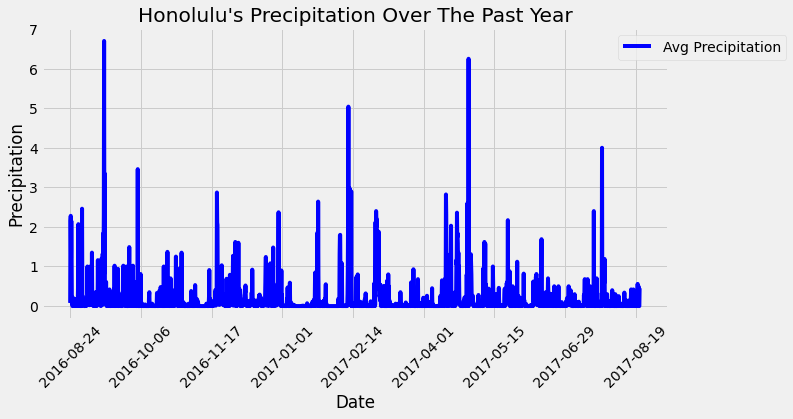

<IPython.core.display.Javascript object>

In [13]:
# Plot The Results
prcp_df.plot(rot=45, color="blue", figsize=(10, 5))
plt.title("Honolulu's Precipitation Over The Past Year")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.savefig("Precipitation.png")
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Avg Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<IPython.core.display.Javascript object>

In [15]:
# Query Total Number Of Stations In The Dataset
stations_cmd = session.query(Station).distinct().count()
stations_cmd

9

<IPython.core.display.Javascript object>

In [16]:
# Query Most Active Stations
# List the stations and the counts in descending order
most_active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

print(f"Most Active Stations:")
mat_df = pd.DataFrame(most_active_stations, columns=["station", "count"]).set_index(
    "station"
)
mat_df

Most Active Stations:


,count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


<IPython.core.display.Javascript object>

In [17]:
# Query Min, Max, and Average Temp Recorded From Most Active Stations
stations_tobs = (
    session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs),
    )
    .filter(Measurement.station == most_active_stations[0][0])
    .all()
)

stations_tobs
print(f"Most Active Station Temperatures")
print(
    f"Low: {stations_tobs[0][0]} High: {stations_tobs[0][1]} Average: {round(stations_tobs[0][2], 1)}"
)

Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


<IPython.core.display.Javascript object>

In [18]:
# Choose the station with the highest number of temperature observations.
print(f"Most Active Station:")
most_active_stations[0][0]

Most Active Station:


'USC00519281'

<IPython.core.display.Javascript object>

In [19]:
# Query Last 12 Months of Temp Observation Data From Most Active Station

past_year_tobs = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_stations[0][0])
    .filter(Measurement.date >= dt.datetime(2016, 8, 23))
    .order_by(Measurement.station)
    .all()
)
past_year_tobs

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

<IPython.core.display.Javascript object>

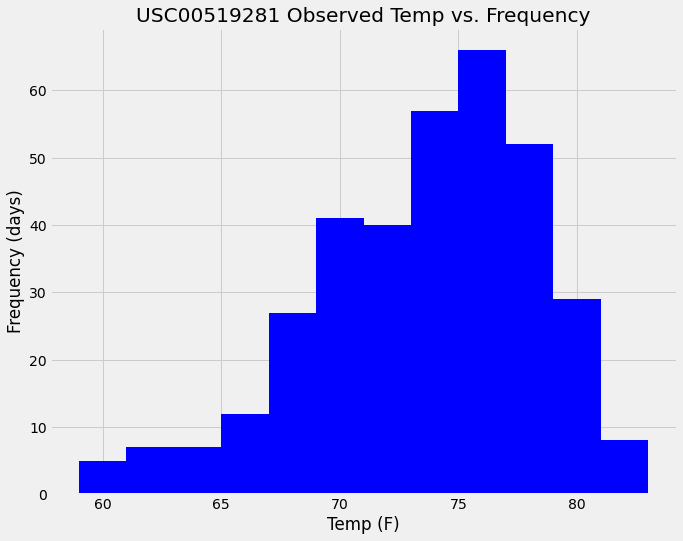

<IPython.core.display.Javascript object>

In [20]:
# Plot The Results
pd.DataFrame(past_year_tobs).hist(bins=12, figsize=(10, 8), color="blue")
plt.title("USC00519281 Observed Temp vs. Frequency")
plt.xlabel("Temp (F)")
plt.ylabel("Frequency (days)")
plt.savefig("Temp_Frequency.png")
plt.show()

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d'
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

    return (
        session.query(
            func.min(Measurement.tobs),
            func.avg(Measurement.tobs),
            func.max(Measurement.tobs),
        )
        .filter(Measurement.date >= start_date)
        .filter(Measurement.date <= end_date)
        .all()
    )


# function usage example
print(calc_temps("2012-02-28", "2012-03-05"))

[(62.0, 69.57142857142857, 74.0)]


<IPython.core.display.Javascript object>

In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax for your trip
trip = calc_temps("2016-12-25", "2017-1-02")
trip

[(58.0, 74.06944444444444, 87.0)]

<IPython.core.display.Javascript object>

In [23]:
trip_df = pd.DataFrame(trip, columns=["trip min", "trip max", "trip avg"])
trip_df

,trip min,trip max,trip avg
0,58.0,74.069444,87.0


<IPython.core.display.Javascript object>

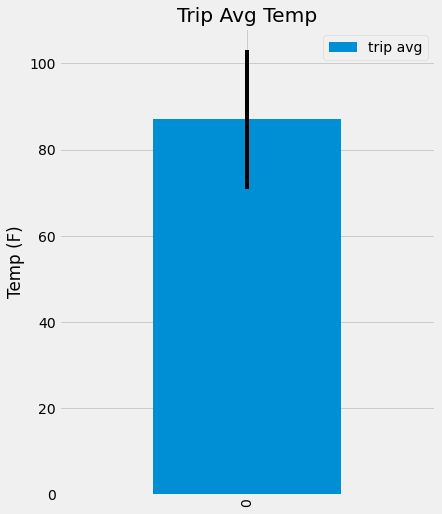

<IPython.core.display.Javascript object>

In [24]:
# Plot The Results
trip_df.plot.bar(
    y="trip avg",
    yerr=(trip_df["trip max"] - trip_df["trip min"]),
    title="Trip Avg Temp",
    figsize=(6, 8),
)
plt.ylabel("Temp (F)")
plt.savefig("TripAvgTemp.png")
plt.show()

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_start = "2016-12-25"
trip_end = "2017-1-02"

select = [
    Station.station,
    Station.name,
    Station.latitude,
    Station.longitude,
    Station.elevation,
    func.sum(Measurement.prcp),
]

trip_temp_df = (
    session.query(*select)
    .filter(Measurement.date >= trip_start)
    .filter(Measurement.date <= trip_end)
    .filter(Measurement.station == Station.station)
    .group_by(Measurement.station)
    .order_by(func.sum(Measurement.prcp).desc())
    .all()
)
pd.DataFrame(
    trip_temp_df,
    columns=[
        "Station ID",
        "Name",
        "Latitude",
        "Longitude",
        "Elevation",
        "Total Precipitation",
    ],
)

,Station ID,Name,Latitude,Longitude,Elevation,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,75.22
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,45.10
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,36.04
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,27.56
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,23.04
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,10.87
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,3.39


<IPython.core.display.Javascript object>

<h1> Quick Analysis </h1><br>

* Station USC00516128 had the highest total precipitation during my trip the previous year (75.22 mm)
* Station USC00517948 had the lowest total precipitation during my trip the previous year (3.39 mm)
* Based on the data, the avg temp should be 87 degrees F during my trip 